## Linear Regression with threshold optimization
Need to add crossvalidation

In [58]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
#from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [41]:
!pip install keras

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f5bae48b710>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /simple/keras/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f5bae48b5f8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /simple/keras/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f5bae48b6a0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /simple/keras/
  Retrying (Retry(total=1, connect=None, read=Non

In [59]:
df = utils.get_dataset()

In [60]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [61]:
df = preprocessing.impute_income_KNN(df)

In [62]:
# get a list of all columns
columns = df.columns.tolist()

In [63]:
# remove target feature Response from the list
columns.remove("Response")

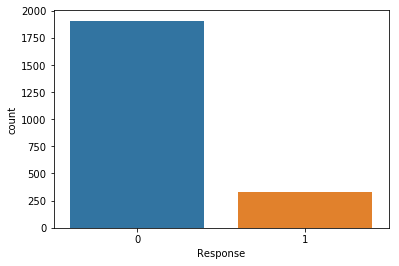

In [64]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [65]:
seed = 0 

In [66]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [67]:
X_train.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
818,1972,2,65685.0,0,1,92,54,642,14,49,...,0,0,0,0,0,1,0,0,0,0
1281,1971,1,49118.0,0,0,680,90,620,54,239,...,1,0,0,0,1,0,0,0,0,0
1766,1980,4,36802.0,1,0,13,23,16,1,2,...,0,0,0,0,0,0,1,0,0,0
1577,1947,4,81574.0,0,0,62,89,1252,0,465,...,0,0,0,0,0,0,0,1,0,0
924,1986,2,83033.0,1,0,42,82,812,99,431,...,0,0,0,0,0,0,0,1,0,0


In [68]:
yX_train = pd.concat([y_train, X_train], axis=1)

In [69]:
corr = yX_train.corr()

In [70]:
#Checking independent variables for linear relationship to outcome variable
#To remove variables with weak correlation
corr["Response"]

Response                   1.000000
Year_Birth                 0.021046
Education                  0.087922
Income                     0.103218
Kidhome                   -0.066943
Teenhome                  -0.154374
Dt_Customer                0.181197
Recency                   -0.186514
MntWines                   0.232859
MntFruits                  0.098639
MntMeatProducts            0.198219
MntFishProducts            0.089865
MntSweetProducts           0.097654
MntGoldProds               0.115828
NumDealsPurchases          0.013933
NumWebPurchases            0.136597
NumCatalogPurchases        0.199357
NumStorePurchases          0.020680
NumWebVisitsMonth          0.020256
AcceptedCmp3               0.253009
AcceptedCmp4               0.187348
AcceptedCmp5               0.313937
AcceptedCmp1               0.298361
AcceptedCmp2               0.178153
Complain                  -0.002215
Marital_Status_Absurd      0.034334
Marital_Status_Alone       0.022495
Marital_Status_Divorced    0

In [71]:
#Dropping variables with corr below modulus(0.05)
yX_train1 = yX_train.drop(["Year_Birth", "NumDealsPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Complain", "Marital_Status_Absurd", "Marital_Status_Alone", "Marital_Status_Divorced", "Marital_Status_Widow", "Marital_Status_YOLO"], axis=1)

In [72]:
corr1 = yX_train1.corr()
corr1["Response"]

Response                   1.000000
Education                  0.087922
Income                     0.103218
Kidhome                   -0.066943
Teenhome                  -0.154374
Dt_Customer                0.181197
Recency                   -0.186514
MntWines                   0.232859
MntFruits                  0.098639
MntMeatProducts            0.198219
MntFishProducts            0.089865
MntSweetProducts           0.097654
MntGoldProds               0.115828
NumWebPurchases            0.136597
NumCatalogPurchases        0.199357
AcceptedCmp3               0.253009
AcceptedCmp4               0.187348
AcceptedCmp5               0.313937
AcceptedCmp1               0.298361
AcceptedCmp2               0.178153
Marital_Status_Married    -0.066304
Marital_Status_Single      0.116632
Marital_Status_Together   -0.079968
Name: Response, dtype: float64

In [73]:
#Dropping variables with corr below modulus(0.1)
yX_train2 = yX_train1.drop(["Education", "Kidhome", "Marital_Status_Together", "Marital_Status_Married", "MntFruits", "MntFishProducts", "MntSweetProducts"], axis=1)

In [74]:
corr2 = yX_train2.corr()
corr2["Response"]

Response                 1.000000
Income                   0.103218
Teenhome                -0.154374
Dt_Customer              0.181197
Recency                 -0.186514
MntWines                 0.232859
MntMeatProducts          0.198219
MntGoldProds             0.115828
NumWebPurchases          0.136597
NumCatalogPurchases      0.199357
AcceptedCmp3             0.253009
AcceptedCmp4             0.187348
AcceptedCmp5             0.313937
AcceptedCmp1             0.298361
AcceptedCmp2             0.178153
Marital_Status_Single    0.116632
Name: Response, dtype: float64

In [75]:
corr2
#possibly drop NumCatalogPurchases as it introduces multicollinearity
yX_train3 = yX_train2.drop(["NumCatalogPurchases"], axis=1)

In [76]:
yX_train3.head()

,Response,Income,Teenhome,Dt_Customer,Recency,MntWines,MntMeatProducts,MntGoldProds,NumWebPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Marital_Status_Single
818,0,65685.0,1,92,54,642,49,57,9,0,0,0,0,0,0
1281,1,49118.0,0,680,90,620,239,119,9,0,1,0,0,1,0
1766,0,36802.0,0,13,23,16,2,1,1,0,0,0,0,0,1
1577,0,81574.0,0,62,89,1252,465,0,4,0,1,1,0,0,0
924,0,83033.0,0,42,82,812,431,33,11,0,0,0,1,0,0


In [87]:
import statsmodels.api as sm
from patsy import dmatrices

y1, X1 = dmatrices('Response ~ Income + Teenhome + Dt_Customer + Recency + MntWines + MntMeatProducts + MntGoldProds + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Marital_Status_Single', data = yX_train3, return_type='dataframe')

lm1 = sm.OLS(y1, X1).fit()
print(lm1.summary())

y2, X2 = dmatrices('Response ~ Income + Teenhome + Dt_Customer + Recency + MntWines + MntMeatProducts + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Marital_Status_Single', data = yX_train3, return_type='dataframe')

lm2 = sm.OLS(y2, X2).fit()
print(lm2.summary())

y3, X3 = dmatrices('Response ~ Teenhome + Dt_Customer + Recency + MntWines + MntMeatProducts + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Marital_Status_Single', data = yX_train3, return_type='dataframe')

lm3 = sm.OLS(y3, X3).fit()
print(lm3.summary())

y4, X4 = dmatrices('Response ~ Teenhome + Dt_Customer + Recency + MntMeatProducts + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Marital_Status_Single', data = yX_train3, return_type='dataframe')

lm4 = sm.OLS(y4, X4).fit()
print(lm4.summary())

y5, X5 = dmatrices('Response ~ Teenhome + Dt_Customer + Recency + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + AcceptedCmp1 + AcceptedCmp2 + Marital_Status_Single', data = yX_train3, return_type='dataframe')

lm5 = sm.OLS(y5, X5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     51.61
Date:                Fri, 26 Apr 2019   Prob (F-statistic):          9.23e-121
Time:                        21:22:08   Log-Likelihood:                -349.52
No. Observations:                1792   AIC:                             729.0
Df Residuals:                    1777   BIC:                             811.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.06

In [78]:
X_train1 = yX_train[["Teenhome", "Dt_Customer", "Recency", "NumWebPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Marital_Status_Single"]]
y_train1 = yX_train[["Response"]]

In [79]:
X_train1.shape

(1792, 10)

In [80]:
X_test = X_test[["Teenhome", "Dt_Customer", "Recency", "NumWebPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Marital_Status_Single"]]

In [81]:
X_test.shape

(448, 10)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
model.fit(X_train1, y_train1)
y_predicted = model.predict(X_test)

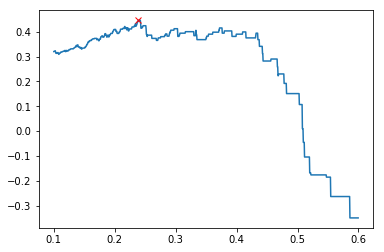

In [84]:
threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)

In [85]:
y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.446
